# Blank

In [1]:
import torch as tt
import torch.nn as nn
import torch.optim as optim
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt 
rng = default_rng(12)
import gym
import UEMEC.basic as basic
import UEMEC.relearn.core as core
import UEMEC.relearn.dqn as dqn



 ~  R  E  L  E  A  R  N  ~



In [2]:
env = gym.make('CartPole-v0')
nS, nA = 4, 2

In [3]:
mem = core.MEMORY( 10_000, None, 
        S=((nS,),np.float32),
        A=((1,),np.int8),
        R=((1,),np.float32),
        D=((1,),np.int8),
        )

In [4]:
basic.show(mem)

=-=-=-=-==-=-=-=-=
DICT: <class 'UEMEC.relearn.core.MEMORY'>
=-=-=-=-==-=-=-=-=
rng	:	Generator(PCG64)
capacity	:	10000
buffers	:	{'S': array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32), 'A': array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int8), 'R': array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32), 'D': array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int8)}
keys	:	dict_keys(['S', 'A', 'R', 'D'])
ranger	:	[   0    1    2 ... 9997 9998 9999]
mask	:	[False False False ... False False False]
at_max	:	False
ptr	:	0
ltr	:	None
length	:	0
count	:	0
=-=-=-=-==-=-=-=-=



In [5]:
mem.render_all()

=-=-=-=-==-=-=-=-=@[MEMORY]=-=-=-=-==-=-=-=-=
Length [0]	Count [0]
Capacity[10000]	Pointer [0]
=-=-=-=-==-=-=-=-=![MEMORY]=-=-=-=-==-=-=-=-=


In [6]:
(mem.length,mem.getlength())

(0, 0)

In [7]:
env._max_episode_steps

200

In [8]:
tstep=0

cs = env.reset()
mem.reset(S=cs)
total_reward = 0
step=0
done=False
while not done and step<env._max_episode_steps:
    step+=1
    action = rng.integers(0, nA)
    ns, reward, done, _ = env.step(action)
    mem.step(S=ns, A=action, R=reward, D=done)
    total_reward+=reward
    print('\tstep:[{}], action:[{}], done:[{}], reward:[{}]'.format(step, action, done, reward))
tstep+=step
print('Reward:[{}]::step:[{}]'.format(total_reward, tstep))

	step:[1], action:[1], done:[False], reward:[1.0]
	step:[2], action:[0], done:[False], reward:[1.0]
	step:[3], action:[1], done:[False], reward:[1.0]
	step:[4], action:[1], done:[False], reward:[1.0]
	step:[5], action:[0], done:[False], reward:[1.0]
	step:[6], action:[0], done:[False], reward:[1.0]
	step:[7], action:[0], done:[False], reward:[1.0]
	step:[8], action:[0], done:[False], reward:[1.0]
	step:[9], action:[1], done:[False], reward:[1.0]
	step:[10], action:[0], done:[False], reward:[1.0]
	step:[11], action:[0], done:[False], reward:[1.0]
	step:[12], action:[0], done:[False], reward:[1.0]
	step:[13], action:[1], done:[False], reward:[1.0]
	step:[14], action:[1], done:[False], reward:[1.0]
	step:[15], action:[1], done:[False], reward:[1.0]
	step:[16], action:[0], done:[False], reward:[1.0]
	step:[17], action:[0], done:[False], reward:[1.0]
	step:[18], action:[1], done:[False], reward:[1.0]
	step:[19], action:[0], done:[False], reward:[1.0]
	step:[20], action:[1], done:[False], re

In [9]:
mem.read(mem.sample_random(10))

{'S': array([[-5.4712288e-02, -1.7808874e-01,  1.7663749e-01,  5.6452495e-01],
        [ 4.2426115e-04, -3.6216199e-01,  7.3667012e-02,  6.0667706e-01],
        [ 5.3703163e-02,  2.2376488e-01, -1.3277583e-02, -2.8514454e-01],
        [ 5.8755156e-02, -1.6600989e-01, -1.8914048e-02,  2.8995577e-01],
        [ 4.0275332e-02,  2.8731437e-02,  3.8731971e-03,  5.6003700e-03],
        [-4.7298543e-02, -3.7068728e-01,  1.6058354e-01,  8.0269694e-01],
        [-3.6024369e-02, -5.6370866e-01,  1.3961357e-01,  1.0484986e+00],
        [-6.8189786e-03, -1.6814318e-01,  8.5800551e-02,  3.3807671e-01],
        [ 4.0849958e-02,  2.2379763e-01,  3.9852047e-03, -2.8585801e-01],
        [ 4.4906739e-02, -3.6065313e-01,  4.0139151e-03,  5.7201183e-01]],
       dtype=float32),
 'A': array([[1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0]], dtype=int8),
 'R': array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
       

In [10]:
mem.render_last(1)

=-=-=-=-==-=-=-=-=@[MEMORY]=-=-=-=-==-=-=-=-=
Length [24]	Count [25]
Capacity[10000]	Pointer [25]
____________________________________
SLOT: [-1]	.False.
	S: [[0. 0. 0. 0.]]
	A: [[0]]
	R: [[0.]]
	D: [[0]]
=-=-=-=-==-=-=-=-=![MEMORY]=-=-=-=-==-=-=-=-=


In [11]:
mdev, mdt = 'cuda', tt.float32
modelF = lambda : dqn.MLP(nS,[64,64,64,64,64,64],nA, nn.ReLU, mdev, mdt  )
optF = lambda model : optim.Adam(model.parameters(), lr=0.00025)
hyper = basic.O(** { 
        'discount'          :1.0, 
        'tuf'               :20, 
        'double'            :False, 
        'modelF'            :modelF, 
        'optF'              :optF, 
        'lossF'             :nn.MSELoss,
        'state_key'         :'S', 
        'action_key'        :'A', 
        'reward_key'        :'R', 
        'done_key'          :'D', 
    })

#'state_dim'         :env.nS, 
#'layers_dim'        :[64,64,64], 
#'action_dim'        :env.nA, 


In [12]:
basic.show(hyper)

=-=-=-=-==-=-=-=-=
DICT: <class 'UEMEC.basic.O'>
=-=-=-=-==-=-=-=-=
discount	:	1.0
tuf	:	20
double	:	False
modelF	:	<function <lambda> at 0x00000153EB23C040>
optF	:	<function <lambda> at 0x00000153EB247CA0>
lossF	:	<class 'torch.nn.modules.loss.MSELoss'>
state_key	:	S
action_key	:	A
reward_key	:	R
done_key	:	D
=-=-=-=-==-=-=-=-=



In [13]:
pie = dqn.DQN(hyper, mdev, mdt)
pie.Q

MLP(
  (SEQL): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=64, bias=True)
    (9): ReLU()
    (10): Linear(in_features=64, out_features=64, bias=True)
    (11): ReLU()
    (12): Linear(in_features=64, out_features=2, bias=True)
  )
)

Episode:[21/20]::Loss:[1.10902738571167]
Episode:[41/36]::Loss:[1.0994517803192139]
Episode:[61/14]::Loss:[1.089699625968933]
Episode:[81/16]::Loss:[1.106101155281067]
Episode:[101/21]::Loss:[1.0697786808013916]
Episode:[121/20]::Loss:[1.0597941875457764]
Episode:[141/52]::Loss:[1.049926996231079]
Episode:[161/12]::Loss:[1.0400960445404053]
Episode:[181/16]::Loss:[1.0540800094604492]
Episode:[201/17]::Loss:[1.0215424299240112]
Episode:[221/17]::Loss:[1.0948351621627808]
Episode:[241/14]::Loss:[1.0853203535079956]
Episode:[261/23]::Loss:[1.0755969285964966]
Episode:[281/19]::Loss:[1.0657663345336914]
Episode:[301/23]::Loss:[1.0561211109161377]
Episode:[321/13]::Loss:[1.050103783607483]
Episode:[341/42]::Loss:[1.0443291664123535]
Episode:[361/17]::Loss:[1.0276038646697998]
Episode:[381/16]::Loss:[1.0171170234680176]
Episode:[401/41]::Loss:[1.0103362798690796]
Episode:[421/22]::Loss:[1.080325961112976]
Episode:[441/18]::Loss:[1.0674618482589722]
Episode:[461/12]::Loss:[1.0550496578216553]

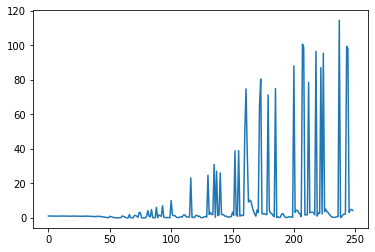

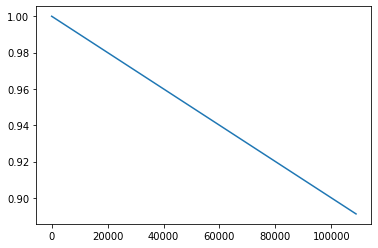

=-=-=-=-==-=-=-=-=
DICT: <class 'UEMEC.relearn.dqn.DQN'>
=-=-=-=-==-=-=-=-=
hyper	:	<UEMEC.basic.O object at 0x00000153EB26BB20>
Q	:	MLP(
  (SEQL): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=64, bias=True)
    (9): ReLU()
    (10): Linear(in_features=64, out_features=64, bias=True)
    (11): ReLU()
    (12): Linear(in_features=64, out_features=2, bias=True)
  )
)
T	:	MLP(
  (SEQL): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=64, bias=True)

In [14]:

#total_reward = 0
epsilon = 1.0
epochs = 5000
train_freq = 20
max_episode_steps=200
train_batch_size = 16
train_times = 2
tstep=0
min_mem = 200
loss_hist = []
eps_hist = []

for epoch in range(epochs):
    cs = env.reset()
    mem.reset(S=cs)
    done, step= False, 0
    while not done and step<env._max_episode_steps:
        step+=1
        tstep+=1
        action = (rng.integers(0, nA)) if rng.random() < epsilon else (pie.predict(cs))
        epsilon -=0.000001
        epsilon = max(0.1, epsilon)
        eps_hist.append(epsilon)
        nS, reward, done, _ = env.step(action)
        mem.step( S=ns, A=action, R=reward, D=done)
        
        
        #print('\tstep:[{}], action:[{}], done:[{}], reward:[{}]'.format(step, action, done, reward))
    #if not (tstep % train_freq):
    if not (epoch % train_freq):
        if mem.length > min_mem:
            aloss = pie.mslearn(train_times, mem, train_batch_size )
            loss_hist.append(aloss)
            print('Episode:[{}/{}]::Loss:[{}]'.format(epoch+1, step, aloss))


plt.plot(loss_hist)
plt.show()
plt.plot(eps_hist)
plt.show()
basic.show(pie)

In [15]:
mem.length

9541

In [17]:
cs = env.reset()
#mem.reset(S=cs)
done, step= False, 0
while not done and step<env._max_episode_steps:
    step+=1
    action =  (pie.predict(cs))
    nS, reward, done, _ = env.step(action)
    print('Step:[{}], Action:[{}], Reward:[{}], Done:[{}]'.format(step, action, reward, done))

Step:[1], Action:[0], Reward:[1.0], Done:[False]
Step:[2], Action:[0], Reward:[1.0], Done:[False]
Step:[3], Action:[0], Reward:[1.0], Done:[False]
Step:[4], Action:[0], Reward:[1.0], Done:[False]
Step:[5], Action:[0], Reward:[1.0], Done:[False]
Step:[6], Action:[0], Reward:[1.0], Done:[False]
Step:[7], Action:[0], Reward:[1.0], Done:[False]
Step:[8], Action:[0], Reward:[1.0], Done:[False]
Step:[9], Action:[0], Reward:[1.0], Done:[False]
Step:[10], Action:[0], Reward:[1.0], Done:[True]
